

# Project: Investigate a Dataset - [Medical Appointment No shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> In this project, I investigate a dataset that of patients appointments in a hospital. The dataset contains information of patients including details on whether they show up for their appointment or not. The columns in the dataset are:
                
>- `PatientId`: identification of a patient
>- `AppointmentID`: identification of each appointment
>- `Gender`: Male or Female
>- `ScheduledDay`: The day of actual appointment
>- `AppointmentDay`: The day someone called or registered the appointment
>- `Age`: How old the patient is
>- `Neigbbourhood`: Where the appointment takes place
>- `Scholarship`: True or False
>- `Hypertension`: True or False
>- `Alcoholism`: True or False
>- `Handicap`: True or False
>- `SMS_received`: 1 or more messages sent to the patient
>- `No-show`: True or False


### Question(s) for Analysis


> 1. Which gender is more likely to show up for appointments? What features could contribute to this?
> 2. In what order of age-grouping do patients attend/miss their appointments? What may be the reason for the order?
> 3. In which neighbourhoods have appointment taken place the most?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check for null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check for duplicate entries
df.duplicated().sum()

0

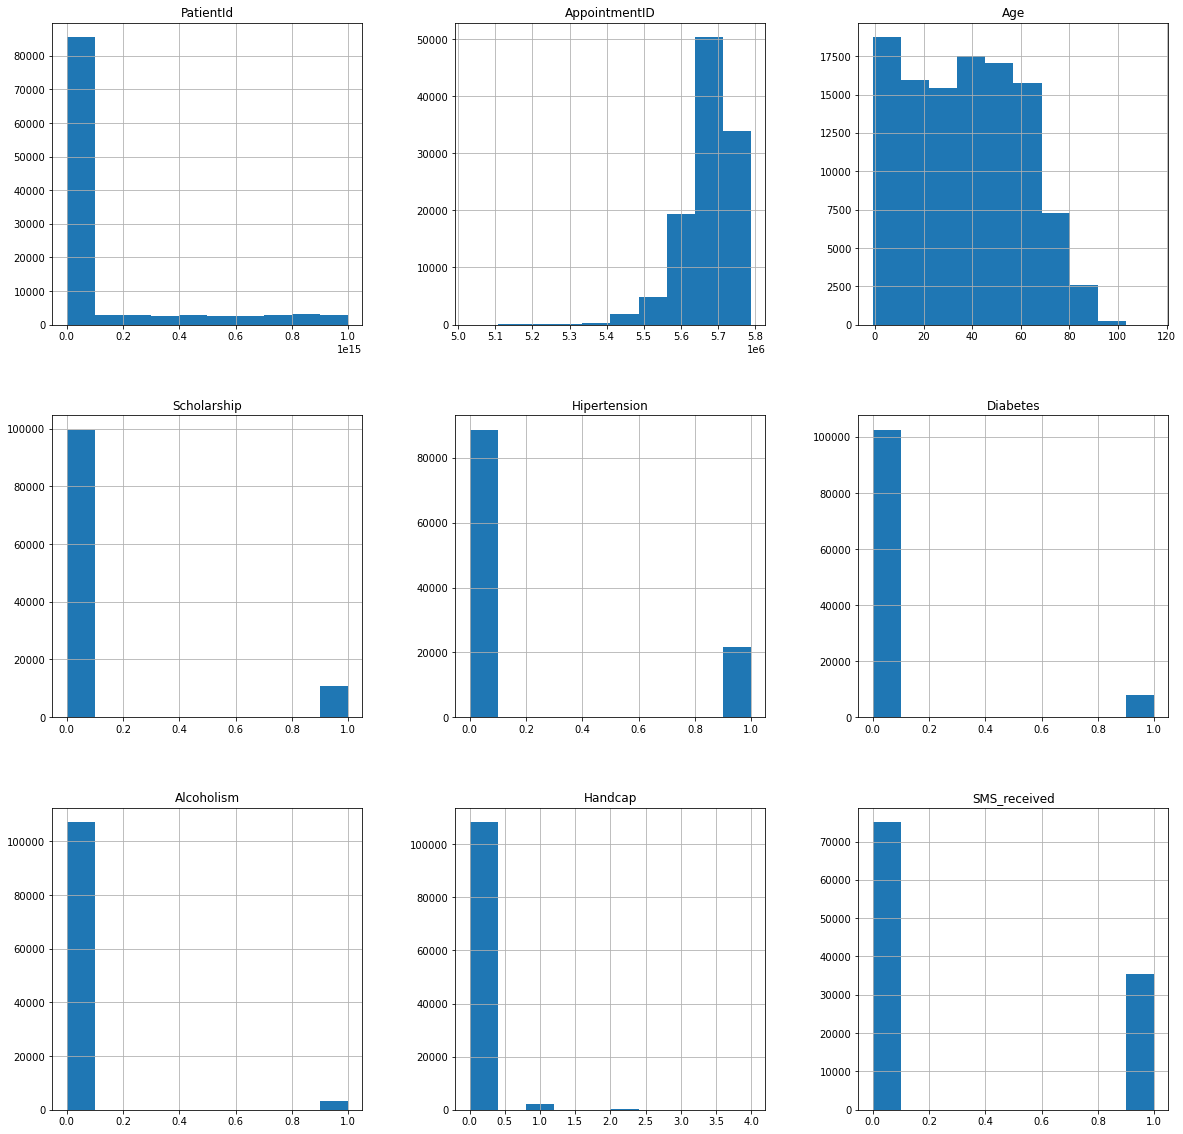

In [5]:
# general overview of data
df.hist(figsize=(20,20));

It seems Age column contains negative values. Further investigation in the following cell...

In [6]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


No one can have a negative Age, there this entry will affect our analysis.

**So far...**
- There are no missing values in the dataset
- There are no duplicate entries in the data
- Data types of ScheduledDay & AppointmentDay are not in their suitable formats. They should be converted to datetime formats
- Hipertension & Handcap column names are not spelt correctly. They should be renamed
- One observation contains a negative Age. This observation can be dropped since it isn't correct.
- column names should also be changed to lower case. This is easier to work with. also, hyphens should be changed to underscores. Underscores are easier to work with in python


### Data Cleaning
 

In [7]:
"Create function to convert 'ScheduledDay' & 'AppointmentDay' to datetime"
def to_date(cols):
    for i in cols:
        df[i] = pd.to_datetime(df[i])

In [8]:
df.drop(df[df['Age'] < 0].index,axis=0,inplace=True)
to_date(['AppointmentDay','ScheduledDay'])

df['PatientId'] = df['PatientId'].astype('int64')

The following were performed in the cells above
- Created function to convert necessary columns to datetime
- dropped `PatientId` & `AppointmentID` columns
- dropped row(s) which have negative ages
- converted `AppointmentDay` & `ScheduledDay` to datetime
- change datatype of `PatientId` from float to int

In [9]:
'Create new column to compute time difference between ScheduledDay and AppointmentDay'
df['interval'] = df['ScheduledDay'] - df['AppointmentDay']
df['interval'] = df['interval'].dt.days

`interval` is the number of days between the day an appointment was booked and the day when the appointment will take place. This feature can give information as to whether patients show up for appointments or not

In [10]:
# inspect the interval columns
df['interval']

0          0
1          0
2          0
3          0
4          0
          ..
110522   -35
110523   -35
110524   -41
110525   -41
110526   -41
Name: interval, Length: 110526, dtype: int64

Inspecting the `interval` column, we find that it contains some negative values. This implies that day fixed for appointment was before the day of booking the appointment. This entries should be dropped having seen that they are incorrect.

In [11]:
df.drop(df[df['interval'] < 0].index,axis=0,inplace= True)

- dropped the entries that had inconistent appointment days

In [12]:
df.rename({'Hipertension':'Hypertension','Handcap':'Handicap'},axis=1,inplace=True)
df.rename(columns = lambda x: x.lower().replace('-','_'),inplace= True)
df['gender'] = df['gender'].map({'F':'Female','M':'Male'})

- corrected typorgraphical errors in column labels
- change the case of column labels to lower case and also replace hyphen with underscore
- wrote the gender names in full

In [13]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38567 entries, 0 to 110517
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   patientid       38567 non-null  int64              
 1   appointmentid   38567 non-null  int64              
 2   gender          38567 non-null  object             
 3   scheduledday    38567 non-null  datetime64[ns, UTC]
 4   appointmentday  38567 non-null  datetime64[ns, UTC]
 5   age             38567 non-null  int64              
 6   neighbourhood   38567 non-null  object             
 7   scholarship     38567 non-null  int64              
 8   hypertension    38567 non-null  int64              
 9   diabetes        38567 non-null  int64              
 10  alcoholism      38567 non-null  int64              
 11  handicap        38567 non-null  int64              
 12  sms_received    38567 non-null  int64              
 13  no_show         38567 non-null

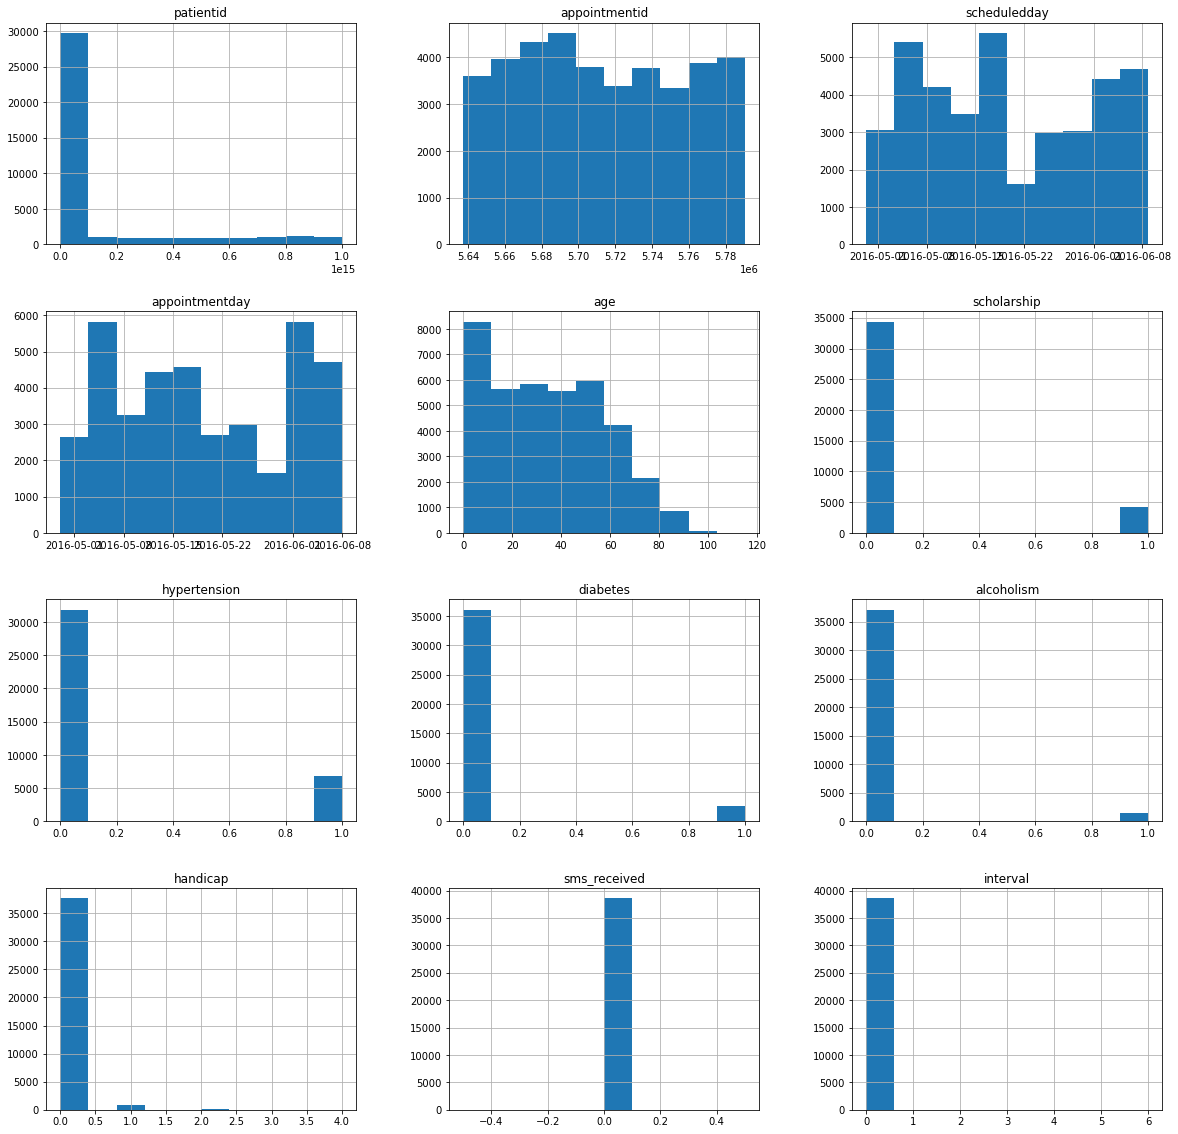

In [14]:
df.hist(figsize=(20,20));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which gender is more likely to show up for appointments? What features could contribute to this?)

total number of females: 23769
total number of males: 14798


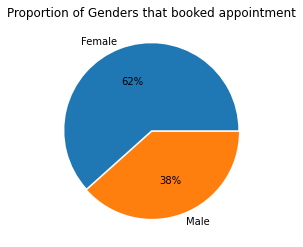

In [15]:
# total number of males and females
total_female = df['gender'].value_counts()[0]
total_male = df['gender'].value_counts()[1]
print('total number of females:',total_female)
print('total number of males:',total_male)

plt.figure(figsize=(4,4))
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%.0f%%',explode=[0.01,0.01])
plt.title('Proportion of Genders that booked appointment');

total number of females that showed up: 920
total number of males that showed up: 877


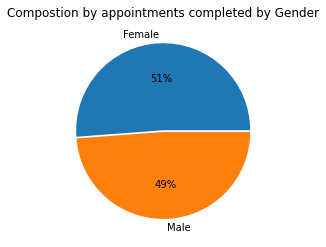

In [16]:
# count of gender that showed up
total_female_show_yes = df[df['no_show']=='Yes'][['gender']].value_counts()[0]
total_male_show_yes = df[df['no_show']=='Yes'][['gender']].value_counts()[1]
print('total number of females that showed up:',total_female_show_yes)
print('total number of males that showed up:',total_male_show_yes)

# Composition of Appointments Completed by Gender
plt.figure(figsize=(4,4))
plt.pie([total_female_show_yes,total_male_show_yes],labels=['Female','Male'],autopct='%.0f%%',explode=[0.01,0.01])
plt.title('Compostion by appointments completed by Gender');

Proportion of females that showed up: 0.038705877403340486
Proportion of males that showed up: 0.05926476550885255


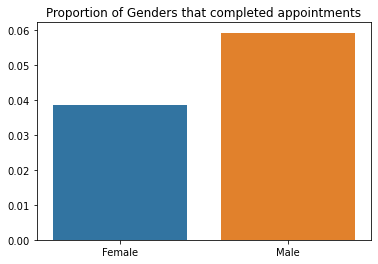

In [17]:
# proportion of females that showed up to total number of females
female_prop = total_female_show_yes/total_female
print('Proportion of females that showed up:',female_prop)

# proportion of males that showed up to total number of males
male_prop = total_male_show_yes/total_male
print('Proportion of males that showed up:',male_prop)

sns.barplot(x=['Female','Male'],y=[female_prop,male_prop])
plt.title('Proportion of Genders that completed appointments');

In [18]:
# define function to create plot
def bar_plot(df):
    plt.bar(df.index,df);

def titles(title,xlabel,ylabel):
    plt.title(str(title))
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel));

gender
Female    0.199209
Male      0.137451
Name: hypertension, dtype: float64


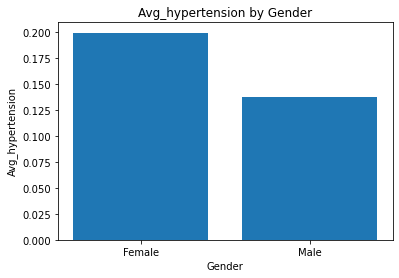

In [19]:
# check for average of hypertension cases in both genders
e = df.groupby('gender').mean()['hypertension']
print(e)
bar_plot(e)
titles('Avg_hypertension by Gender','Gender','Avg_hypertension')

- The above plot shows that the average of hypertension cases in females outweighs the males. This could be a reason why the females miss appointments compared to the males

gender
Female    0.078127
Male      0.047912
Name: diabetes, dtype: float64


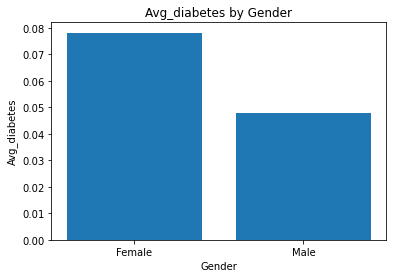

In [20]:
# check for average of diabetes cases in both genders
e = df.groupby('gender').mean()['diabetes']
print(e)
bar_plot(e)
titles('Avg_diabetes by Gender','Gender','Avg_diabetes')

- The two plots above show that there are more cases of illnesses in females than males. 
Let's explore the `scholarship` column to check for relationship.

gender
Female    0.139047
Male      0.059805
Name: scholarship, dtype: float64


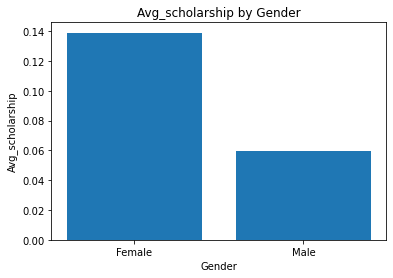

In [21]:
f = df.groupby('gender').mean()['scholarship']
print(f)
bar_plot(f)
titles('Avg_scholarship by Gender','Gender','Avg_scholarship')

- This plot shows that females are awarded scholarships than males. The reason for this may be because the female gender have more cases of illnesses compared to the males genders.

### Research Question 2  (In what order of age-grouping do patients attend/miss their appointments? What may be the reason for the order?)

In [22]:
# divide age into groups
df['age_group'] = pd.cut(x=df['age'],bins =[0,20,40,60,80,100,120],labels = ['0-20','21-40','41-60','61-80','81-100','101-120'])

In [23]:
# create dataframe to explore age 
df_age_group = df.groupby('age_group').count()['gender']
df_age_group_present = df.groupby(['no_show','age_group']).count().loc['Yes']['gender']
df_age_group_absent = df.groupby(['no_show','age_group']).count().loc['No']['gender']

In [24]:
# concatenate the two dfs above
df_age = pd.concat([df_age_group,df_age_group_present,df_age_group_absent],axis=1)
df_age.columns=['total_count','present_count','absent_count']

df_age

,total_count,present_count,absent_count
age_group,,,
0-20,11526,838,10688
21-40,10071,391,9680
41-60,9645,344,9301
61-80,4990,148,4842
81-100,925,25,900
101-120,2,0,2


In [25]:
# compute proportions
df_age['present_proportion'] = df_age['present_count']/df_age['total_count']
df_age['absent_proportion'] = df_age['absent_count']/df_age['total_count']
df_age

,total_count,present_count,absent_count,present_proportion,absent_proportion
age_group,,,,,
0-20,11526,838,10688,0.072705,0.927295
21-40,10071,391,9680,0.038824,0.961176
41-60,9645,344,9301,0.035666,0.964334
61-80,4990,148,4842,0.029659,0.970341
81-100,925,25,900,0.027027,0.972973
101-120,2,0,2,0.000000,1.000000


- Table showing the count and proportion of patients who missed/attended appointments by their age_groups 

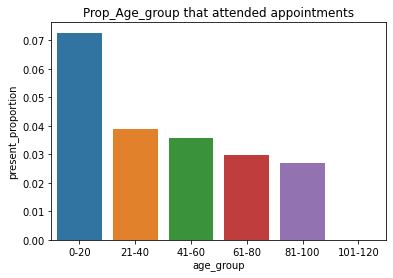

In [26]:
sns.barplot(data=df_age,x=df_age.index,y='present_proportion')
plt.title('Prop_Age_group that attended appointments');

- Plot showing proportion of patients who completed appointments by their age_groups

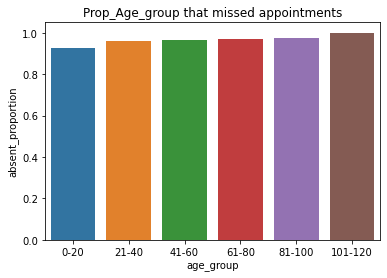

In [27]:
sns.barplot(data=df_age,x=df_age.index,y='absent_proportion')
plt.title('Prop_Age_group that missed appointments');

- Plot showing proportion of patients who missed appointments by their age_groups

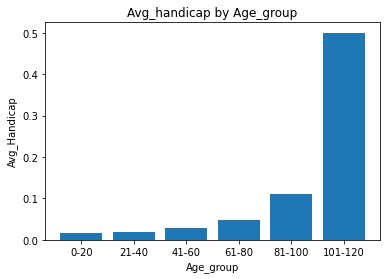

In [28]:
# compare age-group with handicap cases
x = df.groupby('age_group').mean()['handicap']
bar_plot(x)
titles('Avg_handicap by Age_group','Age_group','Avg_Handicap')

- The older the patients, the higher the occurence of handicap cases.

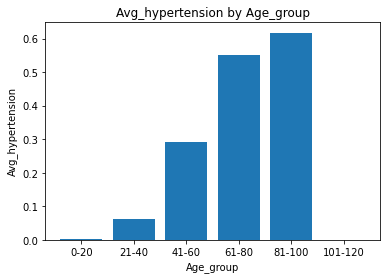

In [29]:
# compare age_group with hypertension cases
x = df.groupby('age_group').mean()['hypertension']
bar_plot(x)
titles('Avg_hypertension by Age_group','Age_group','Avg_hypertension')

- The older the patients, the higher the occurence of hypertension.

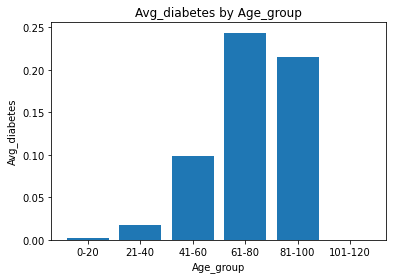

In [30]:
# compare age_group with diabetes cases
x = df.groupby('age_group').mean()['diabetes']
bar_plot(x)
titles('Avg_diabetes by Age_group','Age_group','Avg_diabetes')

- As age increases, diabetes cases also increased generally. Although, this wasn't the case for age_group 81-100. 

### Research Question 3 (In which neighbourhoods have appointment taken place the most?)


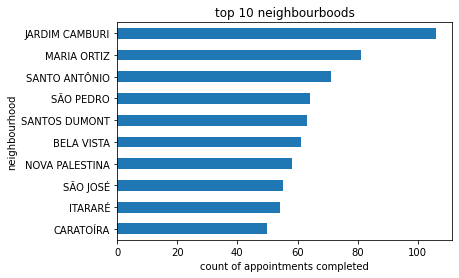

In [31]:
top_ten_neighbourhoods = df.query('no_show == "Yes"')['neighbourhood'].value_counts().head(10)
top_ten_neighbourhoods.sort_values().plot.barh()
titles('top 10 neighbourboods','count of appointments completed','neighbourhood')

The neighbourhood with the highest number of completed appointment is: JARDIM CARMBURI

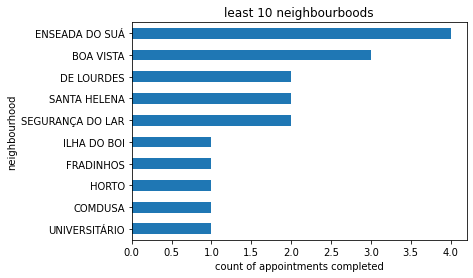

In [32]:
# least_ten_neighbourhoods
least_ten_neighbourhoods = df.query('no_show == "Yes"')['neighbourhood'].value_counts().tail(10)
least_ten_neighbourhoods.sort_values().plot.barh()
titles('least 10 neighbourboods','count of appointments completed','neighbourhood')

The neighbourhood(s) wher appointment(s) were completed least were: ILHA DO BOI, HORTO, COMDUSA & UNIVERSITARIO

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

**Gender Investigation**
> Although, the number of females outweighs the number of males, the proportion of males who kept to their appointments outnumbers that of the females. This shows that males are likely to keep to their appointments than the females.The reason for this could be because hypertension & diabetes(as discovered) were predominant in female gender compared to the male gender. This could also be the reason why more females were given scholarships compared to the males.

**Age Investigation**
> Touching the analyses of the ages of the patients, it was discovered that the older people get, their chances of missing appointments increases. The fact that diseases such as diabetes, hypertension or handicap cases increased with age contributed to this.

**Neighbourhood Investigation**
> The investigation shows that the neighbourhood where appointment took place the most was JARDIM CAMBURI with about 100 appointments completed there. ILHA DO BOI, FRADINHOS, HORTO, COMDUSA & UNIVERSITARIO had the least number completed appointments (1 appointment each).


**Limitations**

> No additional data was provided for neighbourhood column. Perhaps, geographical data could help in telling why some patients may prefer one neighbourhood to another.

> A considerable number of rows had to be dropped because they contained inconsitent features for ScheduledDay or AppointmentDay. If correct data was provided, more insights could be generated from analysis.


### **References**
> NA